In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q fastai==2.4 fastcore==1.3.20

In [3]:
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.PETS)
path_im = path/'images'

In [5]:
fnames = get_image_files(path_im)
pat = r'(.+)_\d+.jpg$'

In [6]:
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
bs = 64

`ImageDataBunch` (renamed to ImageDataLoaders) - highest level API

In [7]:
dls = ImageDataLoaders.from_name_re(path, fnames, pat, batch_tfms=batch_tfms, item_tfms=item_tfms, bs=bs)

We can take a look at a batch of our images using `show_batch` and pass in a aximum number of images to show, and how large we want to view them as

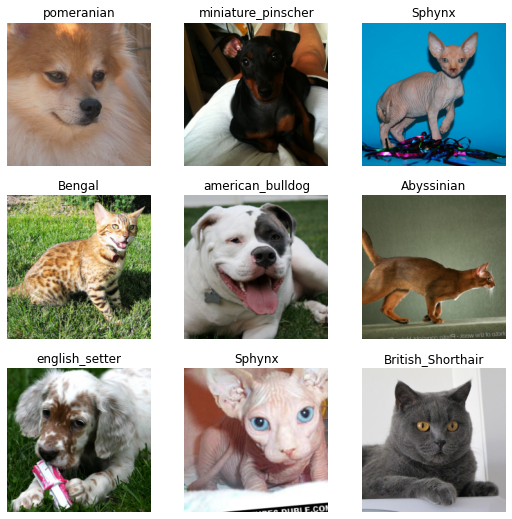

In [8]:
dls.show_batch()

Build and train the model!

In [9]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

In [10]:
learn.fine_tune(15)

epoch,train_loss,valid_loss,accuracy,time
0,1.532066,0.519679,0.837618,01:00


epoch,train_loss,valid_loss,accuracy,time
0,0.476000,0.368450,0.884303,01:02
1,0.364190,0.346929,0.887686,01:02
2,0.283411,0.378370,0.888363,01:02
3,0.248428,0.454196,0.871448,01:02
4,0.177416,0.393480,0.889039,01:02
5,0.143509,0.417226,0.891069,01:02
6,0.105085,0.378913,0.897158,01:02
7,0.088661,0.407338,0.895129,01:02
8,0.064044,0.355185,0.901218,01:02
9,0.042022,0.390276,0.901218,01:02


In [11]:
learn.export('/content/drive/MyDrive/Colab Notebooks/pets.pkl')